In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Question 1

In [2]:
# read dataset function
def read_data(path):
    """
    Reads a CSV file at the given path, removes any duplicate rows,
    and returns its contents as a pandas DataFrame.

    Parameters
    ----------
    path : str
        The sample data input path (csv format)

    Return
    ------
    df : pd.DataFrame
        The sample data input
    """
    # Read data
    df = pd.read_csv(path)

    # Validate
    print('Data shape:', df.shape)

    return df

In [3]:
# Dataset name / Path
path = 'financial_data_log.csv'

# Read the data
df_raw = read_data(path = path)
df_raw.drop(['nameDest','nameOrig'],axis='columns',inplace=True)

Data shape: (20000, 11)


In [4]:
df = df_raw.copy()

In [5]:
# Inspect missing values
print(df.isnull().sum())


step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


there is no missing values in the data

In [6]:
#Inspect Duplicates
print(f'there is {df.duplicated().sum()} duplicates')

# Drop duplicates (if any)
df = df.drop_duplicates()

there is 3 duplicates


In [7]:
df['type'].value_counts()

type
CASH_OUT    7288
PAYMENT     6277
CASH_IN     4121
TRANSFER    2202
DEBIT        109
Name: count, dtype: int64

there is no inconsistencies in the data

In [8]:
# function split input and output
def split_input_output(data, target_column):
    """
    Function to split input (x) and output (y)

    Parameters
    ----------
    data : pd.DataFrame
        The sample data input

    target_column : str
        The output column name

    Return
    ------
    X : pd.DataFrame
        input data

    y : pd.DataFrame
        output data
    """
    X = data.drop(columns = target_column)
    y = data[target_column]

    # Validate
    print('X shape:', X.shape)
    print('y shape :', y.shape)

    return X, y

In [9]:
# Split input x and output y
X, y = split_input_output(data = df,
                          target_column = "isFraud")

X shape: (19997, 8)
y shape : (19997,)


In [10]:
from sklearn.model_selection import train_test_split
def split_train_test(X,y, test_size, random_state=42):
    """
    Split data into train & test

    Parameters
    ----------
    X : pd.DataFrame
        The input data
    test_size : float
        The proportion of number of test data to total data

    stratify : pd.Series
        Reference to stratify the splitting

    random_state : int, default=42
        The random seed, for reproducibility

    Returns
    -------
    X_train : pd.DataFrame
        The input train data

    X_test : pd.DataFrame
        The input test data
    """

    # Then, split train and test
    X_train, X_test,y_train,y_test = train_test_split(
        X,
        y,
        test_size = test_size,
        random_state = random_state
    )

    # Validate
    print('X train shape:', X_train.shape)
    print('X test shape :', X_test.shape)
    print('y train shape:', y_train.shape)
    print('y test shape :', y_test.shape)   
    
    return X_train, X_test,y_train,y_test

In [11]:
splitted_data = split_train_test(
    X = X,
    y=y,
    test_size = 0.2,
    random_state = 42
)

X_train, X_test,y_train,y_test = splitted_data

X train shape: (15997, 8)
X test shape : (4000, 8)
y train shape: (15997,)
y test shape : (4000,)


Summary :
- there is no missing data 
- there are 3 duplicates data
- there is no inconsistencies in the data


## Question 2

In [12]:
eda_df = pd.concat([X_train,y_train],axis=1)

In [13]:
eda_df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,15997.0,2.538139e+02,1.527773e+02,1.0,156.00,251.00,350.00,7.430000e+02
amount,15997.0,2.765048e+05,9.272196e+05,0.0,14963.23,87204.41,231877.06,3.147911e+07
oldbalanceOrg,15997.0,9.049369e+05,2.953385e+06,0.0,0.00,20023.71,161905.25,3.741827e+07
newbalanceOrig,15997.0,8.193914e+05,2.888866e+06,0.0,0.00,0.00,121096.01,3.285196e+07
oldbalanceDest,15997.0,1.063339e+06,3.106842e+06,0.0,0.00,100338.16,871312.84,1.235450e+08
newbalanceDest,15997.0,1.233245e+06,3.393490e+06,0.0,0.00,196675.85,1101293.69,1.238842e+08
isFlaggedFraud,15997.0,8.751641e-04,2.957115e-02,0.0,0.00,0.00,0.00,1.000000e+00
isFraud,15997.0,7.145090e-02,2.575846e-01,0.0,0.00,0.00,0.00,1.000000e+00


- step: Represents time in hours. The data spans approximately 30 days (743 hours). The distribution seems relatively uniform, but analyzing fraud patterns across different step values could reveal time-based vulnerabilities.

- amount: The mean is significantly higher than the median, indicating a right-skewed distribution with large outliers.
A wide range of transaction amounts exists. Large amounts warrant closer scrutiny.

- oldbalanceOrg and newbalanceOrg: Many transactions start with a zero balance (25% and 50% are 0).
A significant drop from oldbalanceOrg to newbalanceOrg may be a red flag.
The large standard deviation and maximum values point to high variance.

- oldbalanceDest and newbalanceDest:Similar to the origin balances, destination balances also have many zero values.
Significant increases in destination balances could indicate money laundering or fraudulent transfers.

- isFlaggedFraud: Extremely low occurrence rate. Very rare event. Indicates a very specific type of fraud, and is not very common in this dataset.

- isFraud: The fraud rate is about 7.14%, indicating a class imbalance.

In [14]:
eda_df.duplicated().sum()

0

In [15]:
eda_df.isna().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
isFraud           0
dtype: int64

In [16]:
# 
eda_df['nplogamount']=np.log10(eda_df["amount"]+1)
eda_df['nplogoldbalanceOrg']=np.log10(eda_df["oldbalanceOrg"]+1)
eda_df['nplognewbalanceOrig']=np.log10(eda_df["newbalanceOrig"]+1)
eda_df['nplognewbalanceDest']=np.log10(eda_df["newbalanceDest"]+1)
eda_df['nplogoldbalanceDest']=np.log10(eda_df["oldbalanceDest"]+1)


In [17]:
eda_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud,nplogamount,nplogoldbalanceOrg,nplognewbalanceOrig,nplognewbalanceDest,nplogoldbalanceDest
5751,33,CASH_OUT,174885.32,0.00,0.00,209733.44,384618.76,0,0,5.242756,0.000000,0.000000,5.585032,5.321670
1691,637,PAYMENT,2847.67,0.00,0.00,0.00,0.00,0,0,3.454642,0.000000,0.000000,0.000000,0.000000
8177,6,PAYMENT,9518.37,0.00,0.00,0.00,0.00,0,0,3.978608,0.000000,0.000000,0.000000,0.000000
10197,380,CASH_OUT,73515.13,0.00,0.00,2108389.14,2181904.27,0,0,4.866383,0.000000,0.000000,6.338836,6.323951
4670,356,PAYMENT,9843.29,25754.00,15910.71,0.00,0.00,0,0,3.993184,4.410862,4.201717,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11287,119,PAYMENT,4001.67,11639.00,7637.33,0.00,0.00,0,0,3.602350,4.065953,3.882998,0.000000,0.000000
11967,300,CASH_IN,385825.87,12534.00,398359.87,0.00,0.00,0,0,5.586392,4.098124,5.600277,0.000000,0.000000
5393,44,PAYMENT,6735.07,620472.00,613736.93,0.00,0.00,0,0,3.828407,5.792723,5.787983,0.000000,0.000000
860,274,TRANSFER,379057.93,379057.93,0.00,0.00,0.00,0,1,5.578707,5.578707,0.000000,0.000000,0.000000


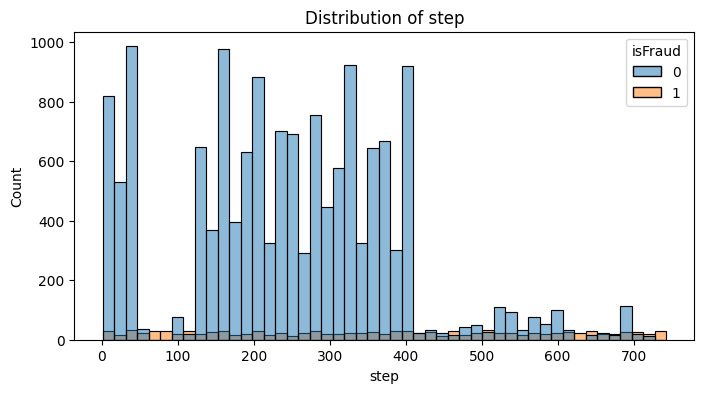

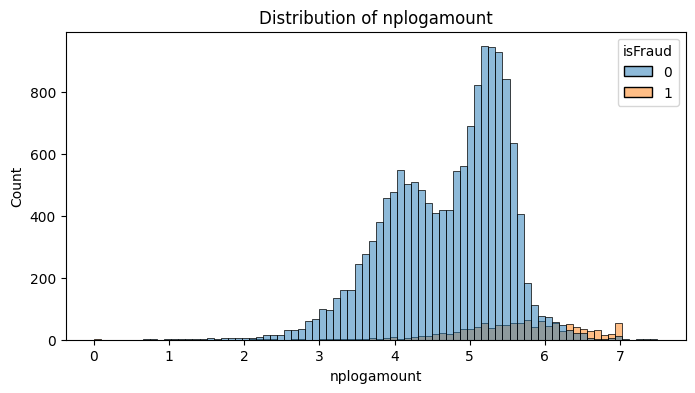

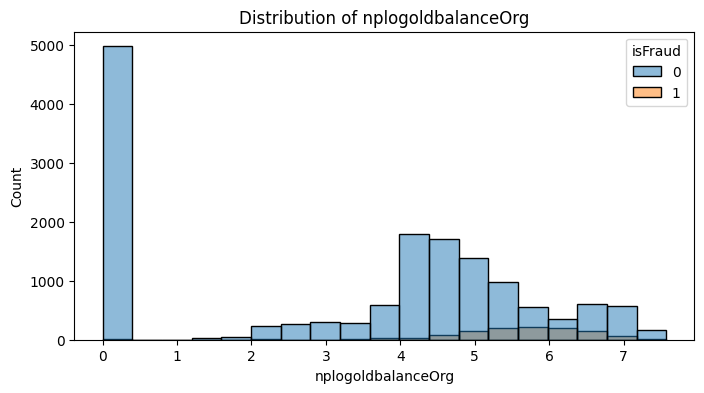

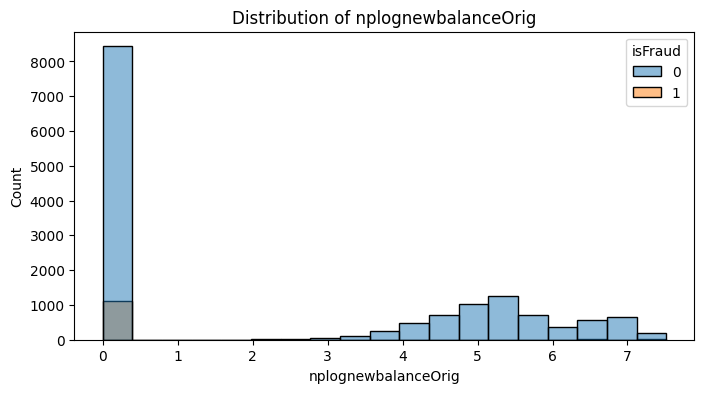

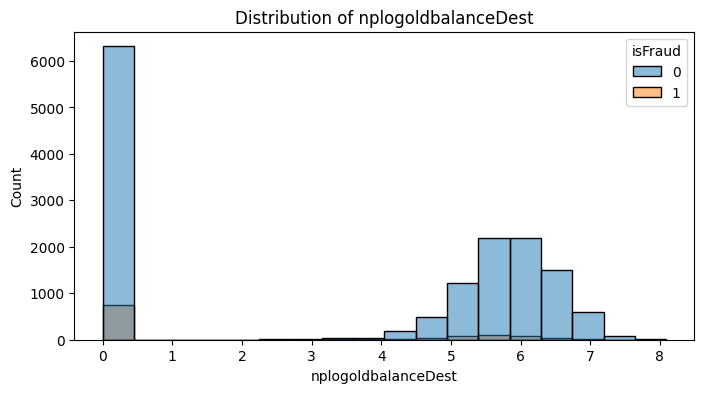

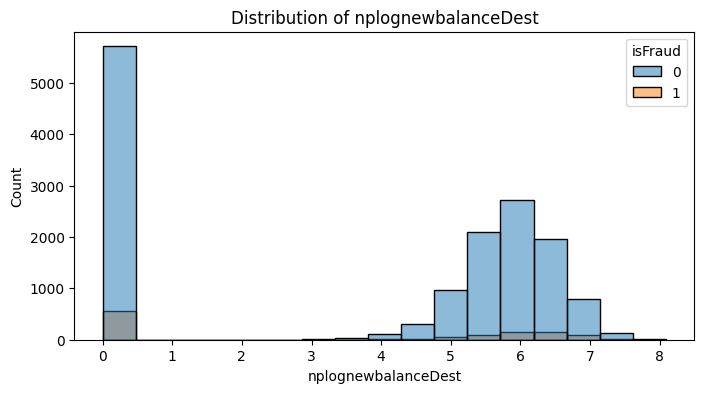

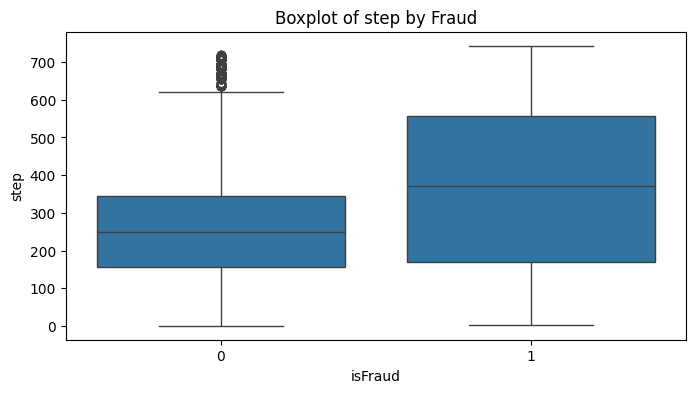

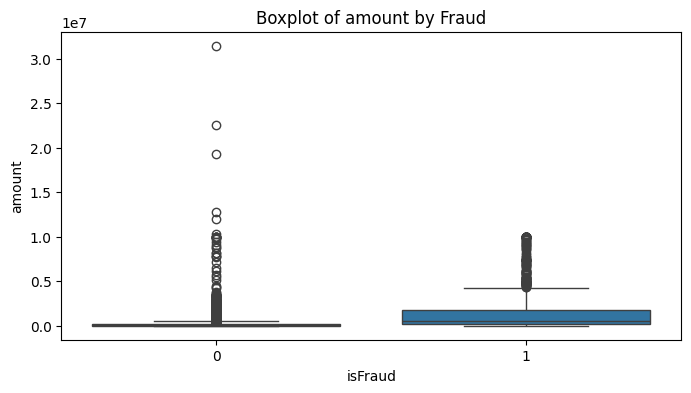

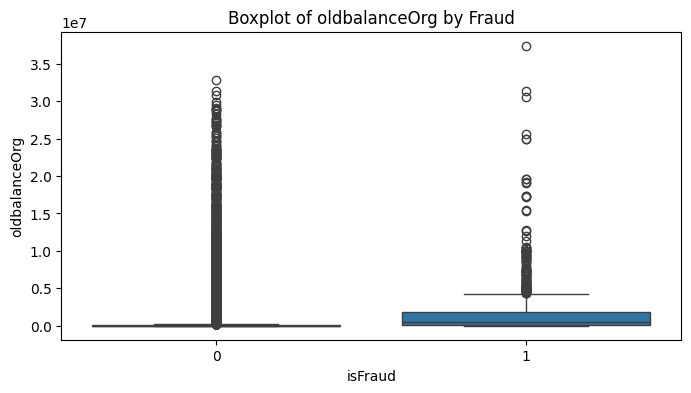

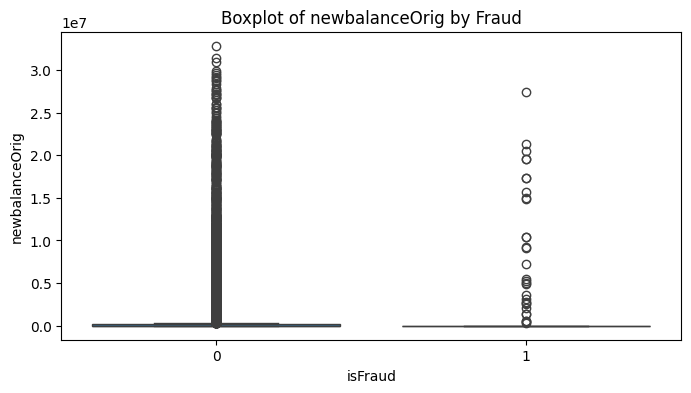

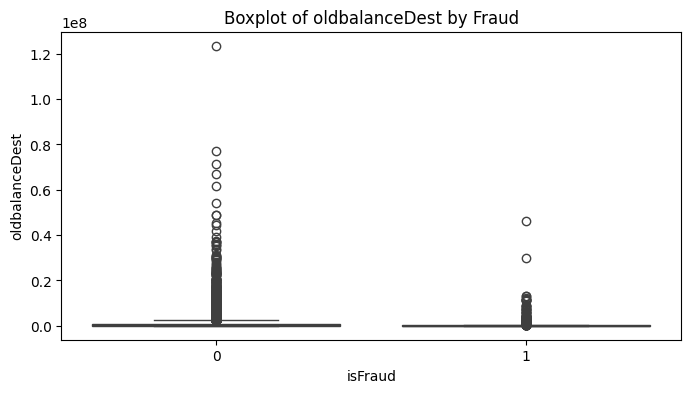

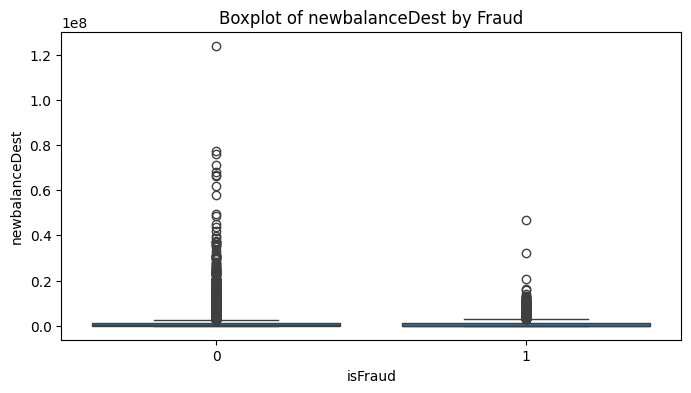

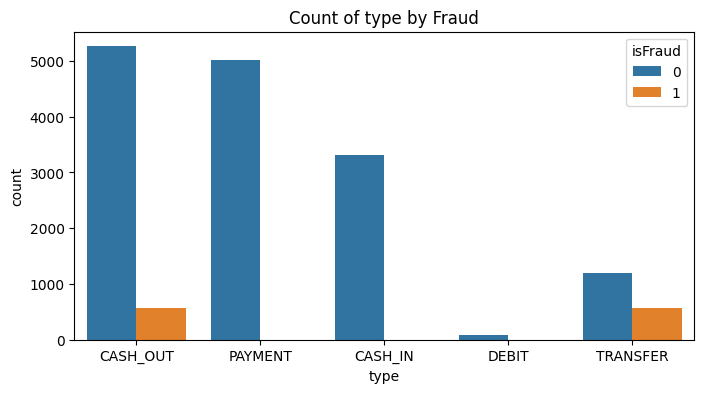

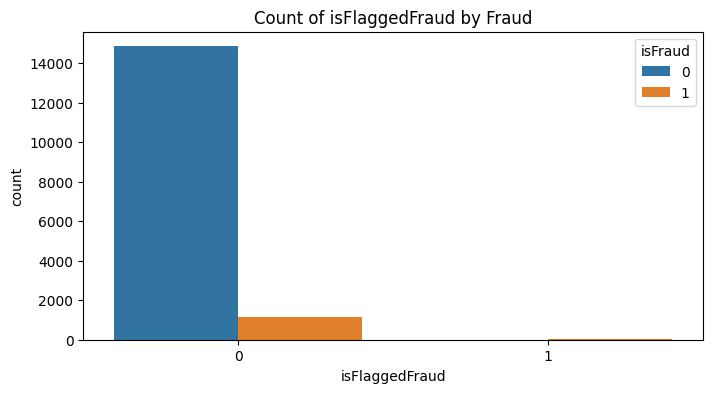

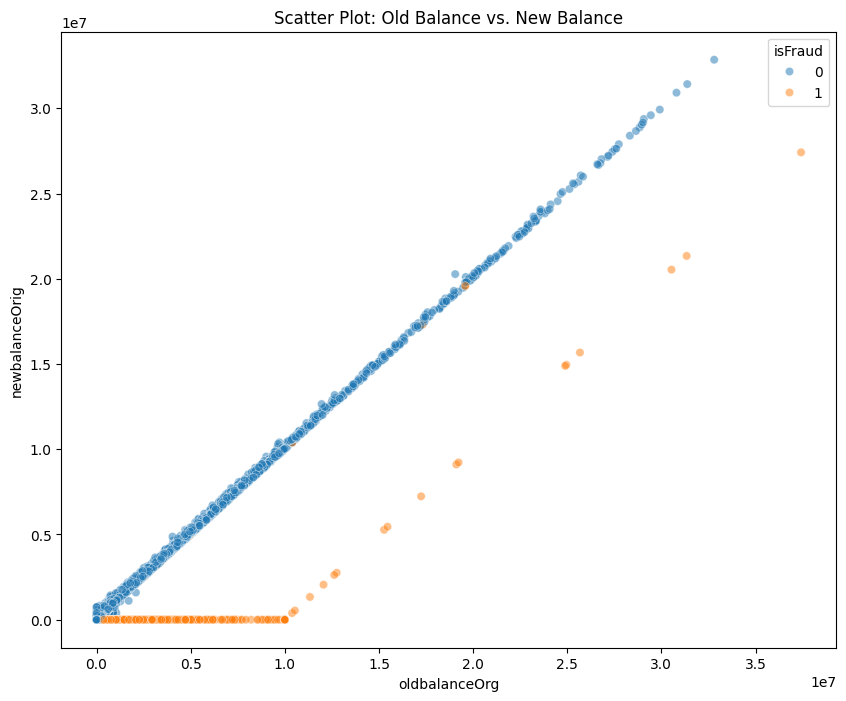

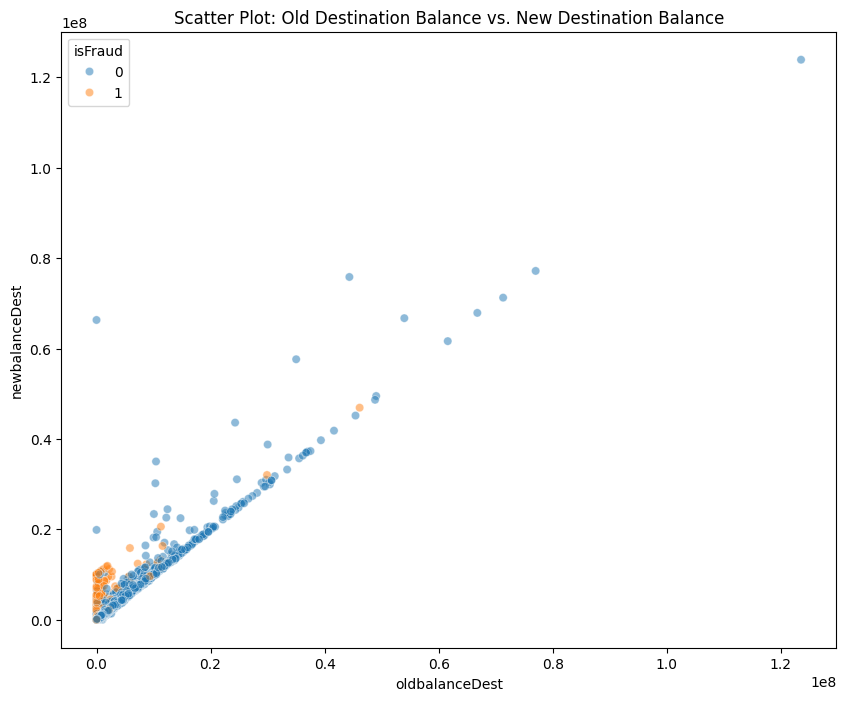

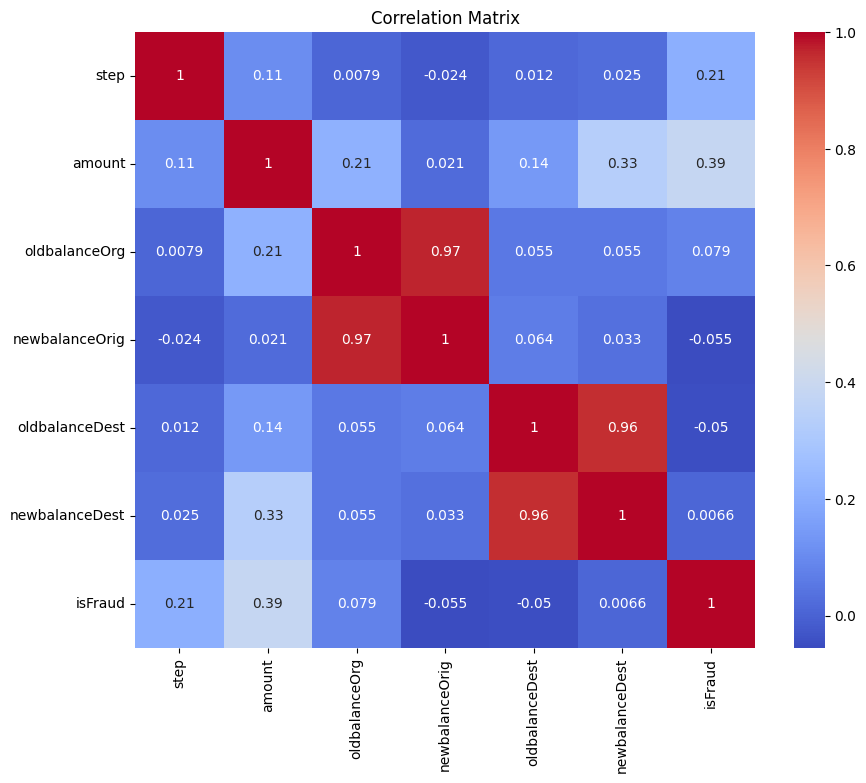

Outliers in step: 346
min step: 156.0 , max step : 350.0

Outliers in amount: 1140
min amount: 14963.23 , max amount : 231877.06

Outliers in oldbalanceOrg: 2840
min oldbalanceOrg: 0.0 , max oldbalanceOrg : 161905.25

Outliers in newbalanceOrig: 2703
min newbalanceOrig: 0.0 , max newbalanceOrig : 121096.01

Outliers in oldbalanceDest: 2042
min oldbalanceDest: 0.0 , max oldbalanceDest : 871312.84

Outliers in newbalanceDest: 1874
min newbalanceDest: 0.0 , max newbalanceDest : 1101293.69



In [54]:
# Univariate and Bivariate Analysis
numerical_features = ["step", "nplogamount", "nplogoldbalanceOrg", "nplognewbalanceOrig", "nplogoldbalanceDest", "nplognewbalanceDest"]
categorical_features = ["type",'isFlaggedFraud']
numerical = ["step", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(x=eda_df[feature],hue=eda_df["isFraud"], kde=False)
    plt.title(f"Distribution of {feature}")
    plt.show()

for feature in numerical:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="isFraud", y=eda_df[feature], data=eda_df)
    plt.title(f"Boxplot of {feature} by Fraud")
    plt.show()

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=eda_df[feature], hue="isFraud", data=eda_df)
    plt.title(f"Count of {feature} by Fraud")
    plt.show()

# Multivariate Analysis
plt.figure(figsize=(10, 8))
sns.scatterplot(x="oldbalanceOrg", y="newbalanceOrig", hue="isFraud", data=eda_df,  alpha=0.5)
plt.title("Scatter Plot: Old Balance vs. New Balance")
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x="oldbalanceDest", y="newbalanceDest", hue="isFraud", data=eda_df, alpha=0.5)
plt.title("Scatter Plot: Old Destination Balance vs. New Destination Balance")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(pd.concat([eda_df[numerical], y_train], axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Outlier Detection (simple example using IQR)
for feature in numerical:
    Q1 = X_train[feature].quantile(0.25)
    Q3 = X_train[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = X_train[(X_train[feature] < lower_bound) | (X_train[feature] > upper_bound)]
    print(f"Outliers in {feature}: {len(outliers)}")
    print (f'min {feature}: {Q1} , max {feature} : {Q3}\n')

Overall Summary of Univariate and Bivariate Analysis 

- Transaction activity(step) is not evenly distributed across time. There are periods of high and low activity.
Fraudulent transactions appear to be slightly more concentrated in the earlier time periods. This suggests potential time-based vulnerabilities.

- Transaction amounts(nplogamount) naturally fall into two distinct groups, even after a log transformation.
Fraudulent transactions are strongly associated with higher transaction amounts. This indicates that larger transactions are a significant fraud risk.

- New balance (nplognewbalanceOrig) histogram shows the high occurrence of transactions that completely drain the originating account.

- The nplogoldbalanceDest and nplognewbalanceDest histograms indicate that fraud is more likely to occur when the destination account has a higher balance, both before and after the transaction.These histograms reinforce the importance of analyzing balance changes and the characteristics of both originating and destination accounts.The fraudulent transactions are more visible within the right tails of these distributions. This means that higher balances, in general, are more likely to be involved in fraudulent transactions.
- The type of transaction is a strong indicator of fraud risk, with CASH_OUT and TRANSFER transactions being the most vulnerable.
- The isFlaggedFraud variable is not a reliable indicator of fraud, as it misses the vast majority of fraudulent transactions.
- The isFlaggedFraud variable may need to be reevaluated, or removed.
- A significant percentage of the data contains outliers, particularly in the balance-related features (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest).
- The amount feature also has a notable percentage of outliers, indicating that high-value transactions are common.
- The step feature has the fewest outliers, suggesting that time-based anomalies are less frequent.

Overall Summary of Multivariate Analysis and Correlation :
- The linear pattern of non-fraudulent transactions provides a baseline for detecting anomalies.
- Most fraudulent transactions result in the newbalanceOrig being zero.
- Fraudulent transactions are more likely to involve destination accounts with higher balances.
- The destination account balances are more varied than the originating account balances, when fraud is involved.
- oldbalanceOrg and newbalanceOrg are highly correlated.
- oldbalanceDest and newbalanceDest are highly correlated.

## Question 3

In [19]:
# Create a function for binning the numerical predictor
def create_binning(data, predictor_label, num_of_bins):
    """
    Function for binning numerical predictor.

    Parameters
    ----------
    data : array like
      The name of dataset.

    predictor_label : object
      The label of predictor variable.

    num_of_bins : integer
      The number of bins.


    Return
    ------
    data : array like
      The name of transformed dataset.

    """
    # Create a new column containing the binned predictor
    data[predictor_label + "_bin"] = pd.qcut(data[predictor_label],
                                             q = num_of_bins,
                                             duplicates = "drop")

    return data

In [20]:
cat_col = eda_df.describe(include = "O").T.index.values
response_variable = "isFraud"

In [21]:
for column in numerical:
    data_train_binned = create_binning(data = eda_df,
                                       predictor_label = column,
                                       num_of_bins = 4)

In [22]:
# Define the initial empty list
crosstab_num = []

for column in numerical:
  # Create a contingency table
  crosstab = pd.crosstab(data_train_binned[column + "_bin"],
                         data_train_binned[response_variable],
                         margins = True)
  # Append to the list
  crosstab_num.append(crosstab)


# Define the initial empty list
crosstab_cat = []

for column in cat_col:

  # Create a contingency table
  crosstab = pd.crosstab(data_train_binned[column],
                         data_train_binned[response_variable],
                         margins = True)

  # Append to the list
  crosstab_cat.append(crosstab)

# Put all two in a crosstab_list
crosstab_list = crosstab_num + crosstab_cat

for i in crosstab_list:
    display(i)

isFraud,0,1,All
step_bin,,,
"(0.999, 156.0]",3755,262,4017
"(156.0, 251.0]",3863,135,3998
"(251.0, 350.0]",3868,143,4011
"(350.0, 743.0]",3368,603,3971
All,14854,1143,15997


isFraud,0,1,All
amount_bin,,,
"(-0.001, 14963.23]",3953,47,4000
"(14963.23, 87204.41]",3857,142,3999
"(87204.41, 231877.06]",3811,188,3999
"(231877.06, 31479113.67]",3233,766,3999
All,14854,1143,15997


isFraud,0,1,All
oldbalanceOrg_bin,,,
"(-0.001, 20023.71]",7937,62,7999
"(20023.71, 161905.25]",3754,245,3999
"(161905.25, 37418265.31]",3163,836,3999
All,14854,1143,15997


isFraud,0,1,All
newbalanceOrig_bin,,,
"(-0.001, 121096.01]",10886,1112,11998
"(121096.01, 32851957.89]",3968,31,3999
All,14854,1143,15997


isFraud,0,1,All
oldbalanceDest_bin,,,
"(-0.001, 100338.16]",7166,833,7999
"(100338.16, 871312.84]",3819,180,3999
"(871312.84, 123544984.17]",3869,130,3999
All,14854,1143,15997


isFraud,0,1,All
newbalanceDest_bin,,,
"(-0.001, 196675.85]",7348,651,7999
"(196675.85, 1101293.69]",3794,205,3999
"(1101293.69, 123884232.88]",3712,287,3999
All,14854,1143,15997


isFraud,0,1,All
type,,,
CASH_IN,3311,0,3311
CASH_OUT,5261,575,5836
DEBIT,80,0,80
PAYMENT,5011,0,5011
TRANSFER,1191,568,1759
All,14854,1143,15997


In [23]:
# Define the initial list for WOE
WOE_list = []

# Define the initial list for IV
IV_list = []

# Perform the algorithm for all crosstab
for crosstab in crosstab_list:

  # Calculate % Good
  crosstab['p_good'] = crosstab[0]/crosstab[0]['All']

  # Calculate % Bad
  crosstab['p_bad'] = crosstab[1]/crosstab[1]['All']

  # Calculate the WOE
  crosstab['WOE'] = np.log(crosstab['p_good']/(crosstab['p_bad'] + 1e-6))  # add 1e-6 to prevent 0 division

  # Calculate the contribution value for IV
  crosstab['contribution'] = (crosstab['p_good']-crosstab['p_bad'])*crosstab['WOE']

  # Calculate the IV
  IV = crosstab['contribution'][:-1].sum()
  add_IV = {'Characteristic': crosstab.index.name,
            'Information Value': IV}

  WOE_list.append(crosstab)
  IV_list.append(add_IV)

for i in WOE_list:
    display(i)

isFraud,0,1,All,p_good,p_bad,WOE,contribution
step_bin,,,,,,,
"(0.999, 156.0]",3755,262,4017,0.252794,0.229221,9.788189e-02,0.002307
"(156.0, 251.0]",3863,135,3998,0.260065,0.118110,7.893033e-01,0.112045
"(251.0, 350.0]",3868,143,4011,0.260401,0.125109,7.330274e-01,0.099173
"(350.0, 743.0]",3368,603,3971,0.226740,0.527559,-8.444575e-01,0.254029
All,14854,1143,15997,1.000000,1.000000,-9.999995e-07,-0.000000


isFraud,0,1,All,p_good,p_bad,WOE,contribution
amount_bin,,,,,,,
"(-0.001, 14963.23]",3953,47,4000,0.266124,0.041120,1.867445e+00,0.420182
"(14963.23, 87204.41]",3857,142,3999,0.259661,0.124234,7.371970e-01,0.099836
"(87204.41, 231877.06]",3811,188,3999,0.256564,0.164479,4.445861e-01,0.040939
"(231877.06, 31479113.67]",3233,766,3999,0.217652,0.670166,-1.124631e+00,0.508912
All,14854,1143,15997,1.000000,1.000000,-9.999995e-07,-0.000000


isFraud,0,1,All,p_good,p_bad,WOE,contribution
oldbalanceOrg_bin,,,,,,,
"(-0.001, 20023.71]",7937,62,7999,0.534334,0.054243,2.287525e+00,1.098220
"(20023.71, 161905.25]",3754,245,3999,0.252727,0.214348,1.647015e-01,0.006321
"(161905.25, 37418265.31]",3163,836,3999,0.212939,0.731409,-1.233967e+00,0.639774
All,14854,1143,15997,1.000000,1.000000,-9.999995e-07,-0.000000


isFraud,0,1,All,p_good,p_bad,WOE,contribution
newbalanceOrig_bin,,,,,,,
"(-0.001, 121096.01]",10886,1112,11998,0.732867,0.972878,-2.832965e-01,0.067995
"(121096.01, 32851957.89]",3968,31,3999,0.267133,0.027122,2.287381e+00,0.548998
All,14854,1143,15997,1.000000,1.000000,-9.999995e-07,-0.000000


isFraud,0,1,All,p_good,p_bad,WOE,contribution
oldbalanceDest_bin,,,,,,,
"(-0.001, 100338.16]",7166,833,7999,0.482429,0.728784,-4.125449e-01,0.101632
"(100338.16, 871312.84]",3819,180,3999,0.257102,0.157480,4.901679e-01,0.048832
"(871312.84, 123544984.17]",3869,130,3999,0.260469,0.113736,8.285953e-01,0.121582
All,14854,1143,15997,1.000000,1.000000,-9.999995e-07,-0.000000


isFraud,0,1,All,p_good,p_bad,WOE,contribution
newbalanceDest_bin,,,,,,,
"(-0.001, 196675.85]",7348,651,7999,0.494682,0.569554,-1.409408e-01,0.010553
"(196675.85, 1101293.69]",3794,205,3999,0.255419,0.179353,3.535478e-01,0.026893
"(1101293.69, 123884232.88]",3712,287,3999,0.249899,0.251094,-4.772909e-03,0.000006
All,14854,1143,15997,1.000000,1.000000,-9.999995e-07,-0.000000


isFraud,0,1,All,p_good,p_bad,WOE,contribution
type,,,,,,,
CASH_IN,3311,0,3311,0.222903,0.000000,1.231449e+01,2.744936
CASH_OUT,5261,575,5836,0.354181,0.503062,-3.509084e-01,0.052244
DEBIT,80,0,80,0.005386,0.000000,8.591513e+00,0.046272
PAYMENT,5011,0,5011,0.337350,0.000000,1.272888e+01,4.294089
TRANSFER,1191,568,1759,0.080180,0.496938,-1.824188e+00,0.760244
All,14854,1143,15997,1.000000,1.000000,-9.999995e-07,-0.000000


In [24]:
# Put all IV in the table
IV_table = pd.DataFrame(IV_list)

IV_table

,Characteristic,Information Value
0,step_bin,0.467554
1,amount_bin,1.069869
2,oldbalanceOrg_bin,1.744315
3,newbalanceOrig_bin,0.616993
4,oldbalanceDest_bin,0.272046
5,newbalanceDest_bin,0.037452
6,type,7.897785


In [25]:
# Define the predictive power of each characteristic
strength = []

# Assign the rule of thumb regarding IV
for iv in IV_table['Information Value']:
    if iv < 0.02:
        strength.append('Unpredictive')
    elif iv >= 0.02 and iv < 0.1:
        strength.append('Weak')
    elif iv >= 0.1 and iv < 0.3:
        strength.append('Medium')
    else:
        strength.append('Strong')

# Assign the strength to each characteristic
IV_table = IV_table.assign(Strength = strength)

# Sort the table by the IV values
IV_table.sort_values(by='Information Value')

,Characteristic,Information Value,Strength
5,newbalanceDest_bin,0.037452,Weak
4,oldbalanceDest_bin,0.272046,Medium
0,step_bin,0.467554,Strong
3,newbalanceOrig_bin,0.616993,Strong
1,amount_bin,1.069869,Strong
2,oldbalanceOrg_bin,1.744315,Strong
6,type,7.897785,Strong


We have:
- 1 weak
- 1 Medium
- 5 strong characteristics

## Question 4

From the answer above oldbalanceOrg and newbalanceOrg are highly correlated, oldbalanceDest and newbalanceDest are highly correlated, In this calculation will not use them together. newbalancedest will not included too because it has weak characteristics

In [59]:
# Convert type into numerical
def transformType(data):
    type_list = ["CASH_OUT","CASH_IN","DEBIT","PAYMENT","TRANSFER"]

    number_list = [i+1 for i in range(len(type_list))]

    data["type"] = data["type"].replace(type_list, number_list)

    return data

In [60]:
transformType(X_train)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21580\1753304152.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["type"] = data["type"].replace(type_list, number_list)


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,Cluster,KMeans_Fraud
5751,33,1,174885.32,0.00,0.00,209733.44,384618.76,0,0,0
1691,637,4,2847.67,0.00,0.00,0.00,0.00,0,0,0
8177,6,4,9518.37,0.00,0.00,0.00,0.00,0,0,0
10197,380,1,73515.13,0.00,0.00,2108389.14,2181904.27,0,0,0
4670,356,4,9843.29,25754.00,15910.71,0.00,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11287,119,4,4001.67,11639.00,7637.33,0.00,0.00,0,0,0
11967,300,2,385825.87,12534.00,398359.87,0.00,0.00,0,0,0
5393,44,4,6735.07,620472.00,613736.93,0.00,0.00,0,0,0
860,274,5,379057.93,379057.93,0.00,0.00,0.00,0,0,0


In [61]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

def iqr_outlier_detection(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((df[feature] < lower_bound) | (df[feature] > upper_bound)).astype(int)

def zscore_outlier_detection(df, feature):
    mean = df[feature].mean()
    std = df[feature].std()
    return (np.abs((df[feature] - mean) / std) > 3).astype(int)

# Choose variables (based on EDA or WOE)
iqr_vars = ["type","amount", "oldbalanceOrg","step"]
zscore_vars = ["amount", "oldbalanceOrg", "type"]

# Apply IQR and Z-score
iqr_results = pd.DataFrame({f"IQR {var}": iqr_outlier_detection(X_train, var) for var in iqr_vars})
zscore_results = pd.DataFrame({f"Z Score {var}": zscore_outlier_detection(X_train, var) for var in zscore_vars})

# Combine results
ensemble_results = pd.concat([iqr_results, zscore_results], axis=1)

# Calculate proportion of fraud votes
ensemble_results["Proportion"] = ensemble_results.sum(axis=1) / len(ensemble_results.columns)

# Calculate majority vote
ensemble_results["Majority Vote"] = (ensemble_results["Proportion"] > 0.5).astype(int)

print(ensemble_results.head())

# Evaluation Metrics (example)
print(classification_report(y_train, ensemble_results["Majority Vote"]))

       IQR type  IQR amount  IQR oldbalanceOrg  IQR step  Z Score amount  \
5751          0           0                  0         0               0   
1691          0           0                  0         0               0   
8177          0           0                  0         0               0   
10197         0           0                  0         0               0   
4670          0           0                  0         0               0   

       Z Score oldbalanceOrg  Z Score type  Proportion  Majority Vote  
5751                       0             0         0.0              0  
1691                       0             0         0.0              0  
8177                       0             0         0.0              0  
10197                      0             0         0.0              0  
4670                       0             0         0.0              0  
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     14854
  

Overall summary :
- Excellent for minimizing false positives and their associated costs.
- Less effective in capturing the full extent of fraudulent activity.
- Requires investigation to ensure the perfect precision is not due to data leakage or overfitting.



## Question 5

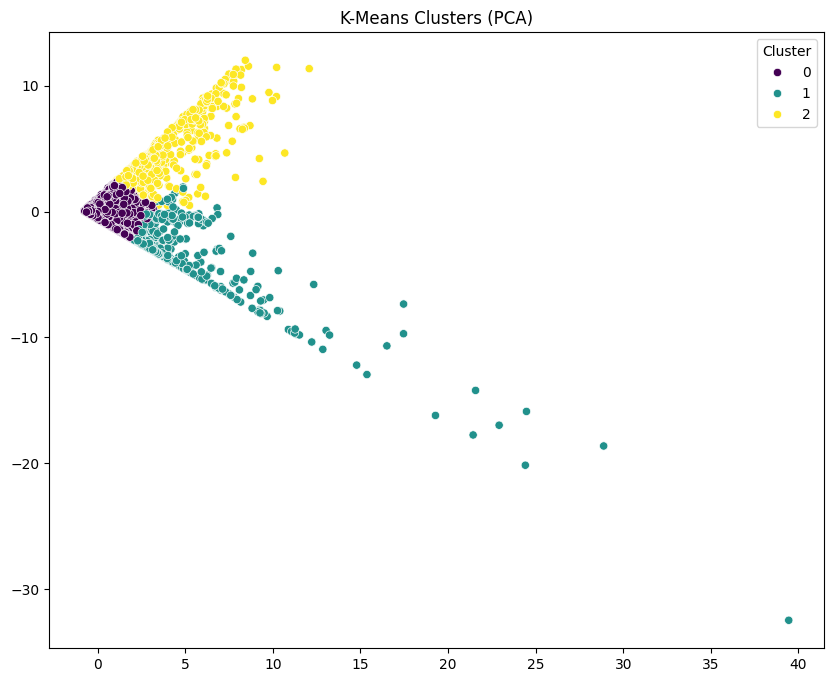

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14854
           1       0.18      0.08      0.11      1143

    accuracy                           0.91     15997
   macro avg       0.55      0.52      0.53     15997
weighted avg       0.88      0.91      0.89     15997



In [62]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Scale numerical features
numerical_X = X_train[numerical]
scaler = StandardScaler()
scaled_X = scaler.fit_transform(numerical_X)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_X)

# Add cluster labels to the dataframe
X_train["Cluster"] = clusters

# Combine X_train and y_train to analyze fraud within clusters
combined_df = pd.concat([X_train, y_train], axis=1)

# Identify fraud based on cluster (cluster with highest fraud proportion)
fraud_clusters = combined_df.groupby("Cluster")["isFraud"].mean().sort_values(ascending=False)
fraud_cluster = fraud_clusters.index[0]  # Cluster with highest fraud proportion

# Label fraud based on cluster
X_train["KMeans_Fraud"] = (X_train["Cluster"] == fraud_cluster).astype(int)

# Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_X)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=X_train["Cluster"], palette="viridis")
plt.title("K-Means Clusters (PCA)")
plt.show()

# Evaluation Metrics
print(classification_report(y_train, X_train["KMeans_Fraud"]))

# Insights:
# - Clusters with higher transaction amounts and unusual balance changes might indicate fraud.
# - Visualizing clusters helps understand data patterns and identify anomalies.

Overall Summary of K-Means Clustering for Fraud Detection

- Outlier-Based Fraud Detection: K-Means clustering, visualized with PCA, effectively identifies potential outliers. Cluster 1, with its dispersed data points, is likely to contain fraudulent transactions.
- Cluster Characteristics:

    Cluster 0 (purple): Likely represents typical, low-risk transactions.
    
    Cluster 2 (yellow): Might represent transactions with slightly different characteristics, but still within a normal range.
    
    Cluster 1 (teal): Contains the outliers and is the most suspicious, warranting further investigation.
- Transactions in Cluster 1 should be given a higher fraud score and investigated further.
- Not suitable when minimizing false positives is a priority.
- Might be considered if capturing as much fraud as possible is more important, but the high false positive rate is a significant drawback.

## Question 6

In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, model_name):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return {"Model": model_name, "Precision": precision, "Recall": recall, "F1-score": f1}

# Evaluate Statistical Ensemble (from Question 4)
statistical_results = evaluate_model(y_train, ensemble_results["Majority Vote"], "Statistical Ensemble")

# Evaluate K-Means (from Question 5)
kmeans_results = evaluate_model(y_train, X_train["KMeans_Fraud"], "K-Means")

# Create comparison table
comparison_table = pd.DataFrame([statistical_results, kmeans_results])
print(comparison_table)

# Strengths and Weaknesses:
# - Statistical Ensemble (IQR/Z-score): Simple, fast, but sensitive to thresholds.
# - K-Means: Can capture complex patterns, but requires feature scaling and cluster selection.

                  Model  Precision    Recall  F1-score
0  Statistical Ensemble   1.000000  0.055118  0.104478
1               K-Means   0.176707  0.076990  0.107252


Model Performance Summary

- Statistical Ensemble:

    - Strengths:
        
        Perfect precision (1.000000), meaning no false positives.

        Effectively avoids incorrectly flagging legitimate transactions as fraud.
    - Weaknesses:
        
        Low recall (0.055118), meaning it misses a significant portion of actual fraud cases.

        Might not be suitable if capturing as much fraud as possible is the primary goal.
        
- K-Means:

    - Strengths:

        Relatively higher recall (0.076990) compared to other models, indicating it captures a slightly larger portion of actual fraud.
    - Weaknesses:
        
        Very low precision (0.176707), leading to a high number of false positives.
        This would result in increased costs associated with investigating false alarms.

## Question 7

In [ ]:
# Model 1: Ensemble with IQR
iqr_vars_model1 =  ["type","amount", "oldbalanceOrg","step"]

iqr_results_model1 = pd.DataFrame({f"IQR {var}": iqr_outlier_detection(X_train, var) for var in iqr_vars_model1})
ensemble_results_model1 = iqr_results_model1
ensemble_results_model1["Proportion"] = ensemble_results_model1.mean(axis=1)
ensemble_results_model1["Majority Vote"] = (ensemble_results_model1["Proportion"] > 0.5).astype(int)

# Model 2: Ensemble with Z-score
zscore_vars_model2 = ["amount", "oldbalanceOrg", "type"] # example variables
zscore_results_model2 = pd.DataFrame({f"Z Score {var}": zscore_outlier_detection(X_train, var) for var in zscore_vars_model2})
ensemble_results_model2 = zscore_results_model2
ensemble_results_model2["Proportion"] = ensemble_results_model2.mean(axis=1)
ensemble_results_model2["Majority Vote"] = (ensemble_results_model2["Proportion"] > 0.5).astype(int)

# Model 3: Combined Ensemble (IQR, Z-score, K-Means)
ensemble_results_model3 = pd.DataFrame({
    "Model 1": ensemble_results_model1["Majority Vote"],
    "Model 2": ensemble_results_model2["Majority Vote"],
    "K-Means": X_train["KMeans_Fraud"]
})
ensemble_results_model3["Proportion"] = ensemble_results_model3.mean(axis=1)
ensemble_results_model3["Majority Vote"] = (ensemble_results_model3["Proportion"] > 0.5).astype(int)
print("Model 3 Combined Ensemble")
print(classification_report(y_train, ensemble_results_model3["Majority Vote"]))

# Model Comparison Table
model3_eval = evaluate_model(y_train, ensemble_results_model3["Majority Vote"], "Model 3")
comparison_table_ensemble = pd.DataFrame([statistical_results, kmeans_results, model3_eval])
print(comparison_table_ensemble)

# Best model selection and comparison insights.

Model 3 Combined Ensemble
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     14854
           1       1.00      0.04      0.07      1143

    accuracy                           0.93     15997
   macro avg       0.97      0.52      0.52     15997
weighted avg       0.94      0.93      0.90     15997

                  Model  Precision    Recall  F1-score
0  Statistical Ensemble   1.000000  0.055118  0.104478
1               K-Means   0.176707  0.076990  0.107252
2               Model 3   1.000000  0.035871  0.069257


Because the goal of this case is to minimizing loss and increasing profitability by detecting fraudulent cases early and reducing the impact of false positives, the Statistical Ensemble model is the best because it achieves perfect precision, which is the most critical metric for your goal of minimizing false positives and reducing the impact of false cases on the company's revenue. While it has low recall, the perfect precision makes it the most suitable model for your specific objective.

But, a perfect precision of 1.000000 is kinda sus and often indicates an issue with the model or the evaluation process. Maybe because the data is imbalance, so fot the next case better to balance the output variable. 

## Question 8

In [68]:
def calculate_roi(y_true, y_pred, df):
    tp = sum((y_true == 1) & (y_pred == 1))
    tn = sum((y_true == 0) & (y_pred == 0))
    fp = sum((y_true == 0) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))

    fraud_amounts_fn = df[(y_true == 1) & (y_pred == 0)]["amount"].sum()
    fraud_amounts_tp = df[(y_true == 1) & (y_pred == 1)]["amount"].sum()

    total_utility = (fraud_amounts_tp + (tn * 70000)) - (fraud_amounts_fn + (fp * (30000 + 70000)))
    total_cost_ownership = 500000000 + 300000000
    total_cost_fraud_handling = (tp + fp) * 200000 + 5000000

    roi = (total_utility / (total_cost_ownership + total_cost_fraud_handling)) * 100
    return roi

# Example with the best model (e.g., Model 3)
roi = calculate_roi(y_train, ensemble_results["Majority Vote"], X_train)
print(f"ROI: {roi}%")

ROI: 39.1443494055773%


The Return of Investment of statistical model is 39.14%